# RandomSearchSV
- Sample some parameter sets
- Among the sampled ones get the best

In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os


In [16]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [17]:
rf = RandomForestRegressor(random_state=24)
kfold = KFold(n_splits=5, shuffle=True, random_state = 24)
params = { 'max_features':[2,3,4,5,6],
          'min_samples_leaf' : [1,10,50], 
          'min_samples_split' : [2,10,50],
          'max_depth' : [None, 3, 5],
          'n_estimators' : [10,20,50]}
gcv = GridSearchCV(rf, param_grid=params,cv=kfold,scoring='r2',verbose=3)
gcv.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ....................max_features=2;, score=0.816 total time=   5.4s
[CV 2/5] END ....................max_features=2;, score=0.805 total time=   5.3s
[CV 3/5] END ....................max_features=2;, score=0.823 total time=   5.3s
[CV 4/5] END ....................max_features=2;, score=0.823 total time=   5.3s
[CV 5/5] END ....................max_features=2;, score=0.820 total time=   5.3s
[CV 1/5] END ....................max_features=3;, score=0.819 total time=   7.3s
[CV 2/5] END ....................max_features=3;, score=0.805 total time=   7.3s
[CV 3/5] END ....................max_features=3;, score=0.823 total time=   7.3s
[CV 4/5] END ....................max_features=3;, score=0.826 total time=   7.2s
[CV 5/5] END ....................max_features=3;, score=0.823 total time=   7.2s
[CV 1/5] END ....................max_features=4;, score=0.816 total time=   9.2s
[CV 2/5] END ....................max_features=4;,

GridSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestRegressor(random_state=24),
             param_grid={'max_features': [2, 3, 4, 5, 6]}, scoring='r2',
             verbose=3)

In [18]:
print("Best Score: ",gcv.best_score_)
print("Best Params: ",gcv.best_params_)

Best Score:  0.8190819884449478
Best Params:  {'max_features': 3}


In [19]:
best_rf = gcv.best_estimator_
best_rf.feature_importances_

array([0.40447493, 0.05350266, 0.09751173, 0.03878486, 0.03157119,
       0.12640151, 0.12539739, 0.12235573])

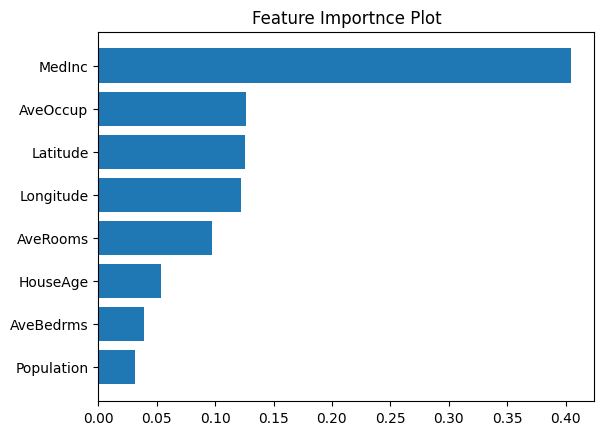

In [27]:
cal_imp = pd.DataFrame({'feature': list(X.columns),
                      'importance':best_rf.feature_importances_})
cal_imp.sort_values('importance', inplace=True)
plt.barh(glass_imp['feature'], cal_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()

# Using Randomization (RandomSearch CV)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=24)
kfold = KFold(n_splits=5, shuffle=True, random_state = 24)
params = { 'max_features':[2,3,4,5,6],
          'min_samples_leaf' : [1,10,50], 
          'min_samples_split' : [2,10,50],
          'max_depth' : [None, 3, 5],
          'n_estimators' : [10,20,50]}
rscv = RandomizedSearchCV(rf, param_distributions=params, cv=kfold ,n_iter=  15, scoring='r2',random_state=24,verbose=3)
rscv.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.795 total time=   2.0s
[CV 2/5] END max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.771 total time=   2.1s
[CV 3/5] END max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.793 total time=   2.0s
[CV 4/5] END max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.792 total time=   2.0s
[CV 5/5] END max_depth=None, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.793 total time=   2.1s
[CV 1/5] END max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.545 total time=   0.6s
[CV 2/5] END max_depth=3, max_features=3, min_samples_leaf=10, min_samples_split=50, n_estimators=50;, score=0.518 total

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=24, shuffle=True),
                   estimator=RandomForestRegressor(random_state=24), n_iter=15,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [1, 10, 50],
                                        'min_samples_split': [2, 10, 50],
                                        'n_estimators': [10, 20, 50]},
                   random_state=24, scoring='r2', verbose=3)

In [37]:
print("Best Score: ",rscv.best_score_)
print("Best Params: ",rscv.best_params_)

Best Score:  0.8172504833002643
Best Params:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': None}


In [38]:
best_rf = rscv.best_estimator_
best_rf.feature_importances_

array([0.39369583, 0.05241321, 0.10070671, 0.03820214, 0.03132332,
       0.12689197, 0.13197445, 0.12479237])

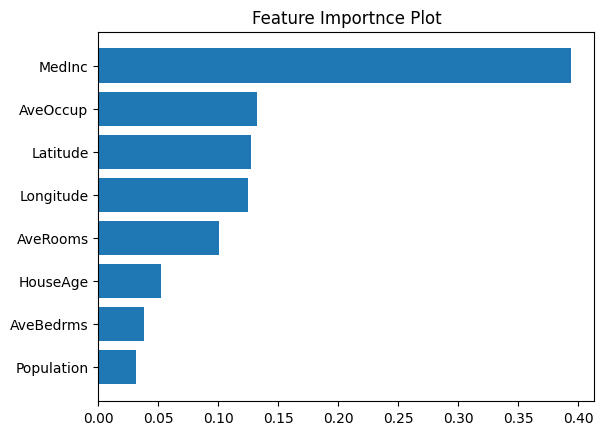

In [39]:
california_imp = pd.DataFrame({'feature': list(X.columns),
                      'importance':best_rf.feature_importances_})
california_imp.sort_values('importance', inplace=True)
plt.barh(glass_imp['feature'], california_imp['importance'])
plt.title("Feature Importnce Plot")
plt.show()

In [41]:
list(pd.DataFrame(rscv.cv_results_)['params'])

[{'n_estimators': 50,
  'min_samples_split': 50,
  'min_samples_leaf': 10,
  'max_features': 3,
  'max_depth': None},
 {'n_estimators': 50,
  'min_samples_split': 50,
  'min_samples_leaf': 10,
  'max_features': 3,
  'max_depth': 3},
 {'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 3,
  'max_depth': None},
 {'n_estimators': 20,
  'min_samples_split': 50,
  'min_samples_leaf': 50,
  'max_features': 3,
  'max_depth': 5},
 {'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 50,
  'max_features': 2,
  'max_depth': 3},
 {'n_estimators': 20,
  'min_samples_split': 2,
  'min_samples_leaf': 50,
  'max_features': 2,
  'max_depth': None},
 {'n_estimators': 50,
  'min_samples_split': 10,
  'min_samples_leaf': 50,
  'max_features': 4,
  'max_depth': None},
 {'n_estimators': 20,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_features': 3,
  'max_depth': None},
 {'n_estimators': 20,
  'min_samples_split': 10,
  'min_samples_leaf':